In [78]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [81]:
cd /Users/yurymoskaltsov/Documents/Data Science/datasets/"Facebook ads"

/Users/yurymoskaltsov/Documents/Data Science/Datasets/Facebook Ads


In [82]:
df = pd.read_csv('facebook_ads_dataset.csv')
print(df.shape)
print(df.head(5))

(1143, 15)
    ad_id reporting_start reporting_end campaign_id fb_campaign_id    age  \
0  708746      17/08/2017    17/08/2017         916         103916  30-34   
1  708749      17/08/2017    17/08/2017         916         103917  30-34   
2  708771      17/08/2017    17/08/2017         916         103920  30-34   
3  708815      30/08/2017    30/08/2017         916         103928  30-34   
4  708818      17/08/2017    17/08/2017         916         103928  30-34   

  gender  interest1  interest2  interest3  impressions  clicks  spent  \
0      M         15         17         17       7350.0       1   1.43   
1      M         16         19         21      17861.0       2   1.82   
2      M         20         25         22        693.0       0   0.00   
3      M         28         32         32       4259.0       1   1.25   
4      M         28         33         32       4133.0       1   1.29   

   total_conversion  approved_conversion  
0               2.0                  1.0  
1

In [91]:
print(df.ad_id.nunique())
print(df.campaign_id.nunique())
unique_campaigns = np.unique(df.campaign_id, return_counts = True)

1143
7


Number of dataframe rows is equal to number of unique_ads. That way we can make sure that every ad is really unique.

In [84]:
campaign_id_to_appr_conversion = df.groupby('campaign_id').approved_conversion.sum().reset_index()
print(campaign_id_to_appr_conversion)

  campaign_id  approved_conversion
0        1178                378.0
1       30-34                  0.0
2       35-39                  0.0
3       40-44                  0.0
4       45-49                  0.0
5         916                 24.0
6         936                183.0


So the data is cleaned. Now we only see the two columns "campaign_id" and "approved_conversion". So we can see which campaign was more successfull in making active customers out of the ad viewers. However, rows 1 to 4 have zero conversion rate and these campaigns are not interesting at all, moreover the format of values in these rows indicates that there might have been a clash with age column, so let's go ahead and remove all the columns that have 0 approved conversion.

This way we are left with rows that are relevant to us. Let's go ahead and create a new column that will show us the success percentage for each campaign.

In [85]:
for i in range(len(campaign_id_to_appr_conversion.approved_conversion)):
    if campaign_id_to_appr_conversion.approved_conversion[i] == 0:
        campaign_id_to_appr_conversion.drop(i, axis = 0,inplace = True)
campaign_id_to_appr_conversion.reset_index()
print(campaign_id_to_appr_conversion)


  campaign_id  approved_conversion
0        1178                378.0
5         916                 24.0
6         936                183.0


In [86]:
campaign_id_to_appr_conversion["success_percentage"] = campaign_id_to_appr_conversion.approved_conversion / campaign_id_to_appr_conversion.approved_conversion.sum()
print(campaign_id_to_appr_conversion)

  campaign_id  approved_conversion  success_percentage
0        1178                378.0            0.646154
5         916                 24.0            0.041026
6         936                183.0            0.312821


We have a success rate, however in the very beginning we saw that the number of the ads per campaign was not equal, so the table above could be hugely misleading if we start interpreting it as is. In order for it to represent success more accurately we need to assign weights to each campaign based on the number of unique ads each of them had. We saw in the beginning that campaigns 1178, 916 and 936 had 243, 54, and 464 unique values, so we have to assign weight to them accordingly. 

In [87]:
campaign_id_to_appr_conversion["weights"] = [243,54,464]
campaign_id_to_appr_conversion["weights_percentage"] = campaign_id_to_appr_conversion.weights/campaign_id_to_appr_conversion.weights.sum()
campaign_id_to_appr_conversion.drop("weights", axis = 1, inplace = True)
print(campaign_id_to_appr_conversion)

  campaign_id  approved_conversion  success_percentage  weights_percentage
0        1178                378.0            0.646154            0.319317
5         916                 24.0            0.041026            0.070959
6         936                183.0            0.312821            0.609724


In [88]:
campaign_id_to_appr_conversion["success_rate"] = campaign_id_to_appr_conversion["success_percentage"] / campaign_id_to_appr_conversion["weights_percentage"]
print(campaign_id_to_appr_conversion)

  campaign_id  approved_conversion  success_percentage  weights_percentage  \
0        1178                378.0            0.646154            0.319317   
5         916                 24.0            0.041026            0.070959   
6         936                183.0            0.312821            0.609724   

   success_rate  
0      2.023552  
5      0.578158  
6      0.513053  


Success rate unlike success_percentage takes into account weights of each campaign. In order not to confuse the potential viewers let's remove all the columns apart from the succes rate.

In [89]:
campaign_id_to_appr_conversion.drop(["approved_conversion", "success_percentage", "weights_percentage"], axis = 1, inplace = True)
print(campaign_id_to_appr_conversion)

  campaign_id  success_rate
0        1178      2.023552
5         916      0.578158
6         936      0.513053


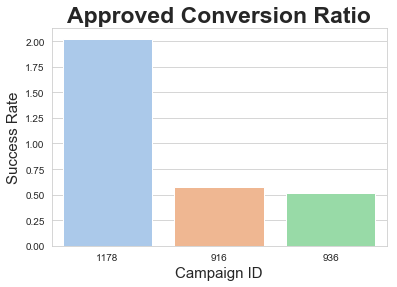

In [90]:
sns.barplot(data = campaign_id_to_appr_conversion, x = "campaign_id", y = "success_rate")
plt.xlabel("Campaign ID", fontsize = 15)
plt.ylabel("Success Rate", fontsize = 15)
plt.title("Approved Conversion Ratio", fontsize = 23, fontweight = "bold")
sns.set_palette("pastel")

